# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:

- Create Jupyter Notebooks (showcasing core skills in Python).
- Create a summary page (via [README.md](README.md)) capturing your findings.
- Share this project via GitHub & LinkedIn

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for EU Data Analyst roles

In [3]:
# Define list of EU countries
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

df_EU = df[(df['job_country'].isin(EU_countries)) & (df['job_title_short'] == 'Data Analyst')]

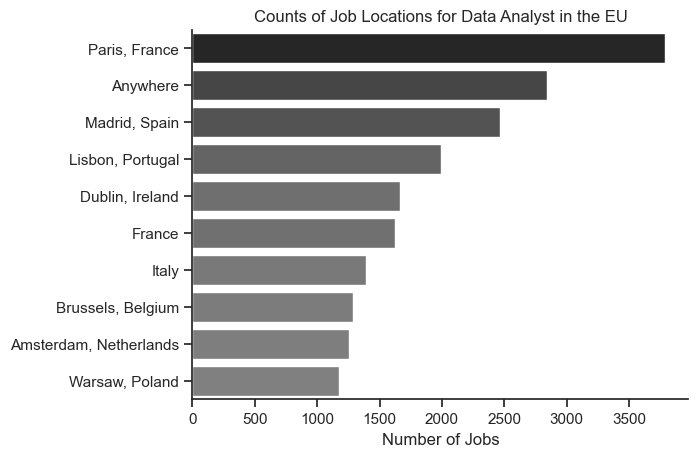

In [5]:
df_plot = df_EU['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:grey_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the EU')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job opportunities

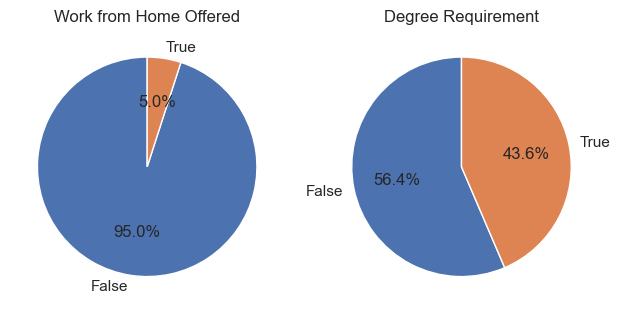

In [6]:
fig, ax = plt.subplots(1, 2)

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_EU[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

fig.tight_layout()


plt.show()

## Companies to Explore

Text(0, 0.5, '')

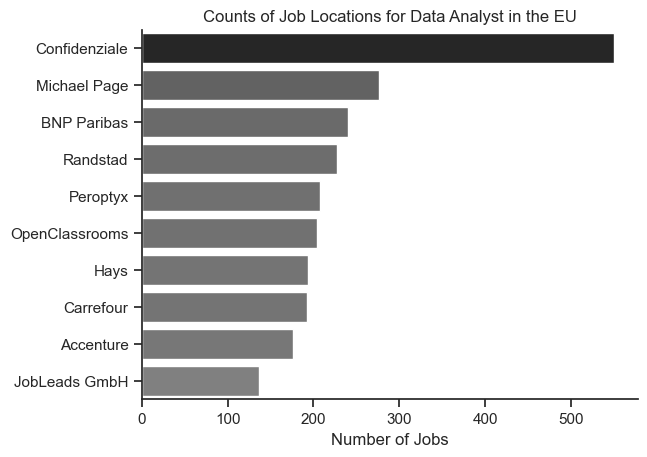

In [7]:
df_plot = df_EU['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:grey_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the EU')
plt.xlabel('Number of Jobs')
plt.ylabel('')